## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [6]:
import os
from tensorflow import keras

# 請嘗試設定 GPU：os.environ


In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x,flatten=True):
    x=(x-x.min())/(x.max()-x.min())*2-1
    if flatten:
        x=x.reshape((len(x),-1))
    return x

def preproc_y(y,num_classes=10):
    if y.shape[-1] ==1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 256, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               16512 

In [11]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256

In [12]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 200us/sample - loss: 1.6997 - accuracy: 0.3949 - val_loss: 1.5390 - val_accuracy: 0.4507
Epoch 2/50
50000/50000 [==============================] - 9s 176us/sample - loss: 1.4733 - accuracy: 0.4774 - val_loss: 1.4450 - val_accuracy: 0.4911
Epoch 3/50
50000/50000 [==============================] - 9s 176us/sample - loss: 1.3508 - accuracy: 0.5228 - val_loss: 1.4131 - val_accuracy: 0.5007
Epoch 4/50
50000/50000 [==============================] - 9s 175us/sample - loss: 1.2515 - accuracy: 0.5553 - val_loss: 1.3494 - val_accuracy: 0.5281
Epoch 5/50
50000/50000 [==============================] - 9s 179us/sample - loss: 1.1677 - accuracy: 0.5867 - val_loss: 1.3623 - val_accuracy: 0.5255
Epoch 6/50
50000/50000 [==============================] - 8s 167us/sample - loss: 1.0902 - accuracy: 0.6141 - val_loss: 1.3597 - val_accuracy: 0.5288
Epoch 7/50
50000/50000 [=========================

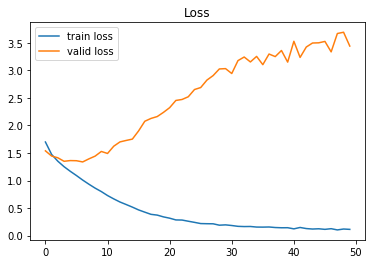

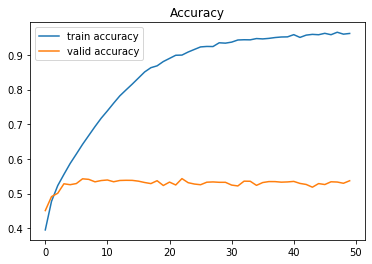

In [15]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()